<a href="https://colab.research.google.com/github/YonseiESC/ESC20-SPRING/blob/master/%EA%B3%BC%EC%A0%9C%20%EC%A0%9C%EC%B6%9C/week6/6%EC%A1%B0/Week6_hw_%EC%9D%B4%EC%9E%AC%EC%83%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 6 Session :: PCA

6조 이재상


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## eigen decomposition 을 이용한 PCA 

In [2]:
# generate toy dataset
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1
angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

X.shape

(60, 3)

In [3]:
# PCA를 수행하기 위해 먼저 공분산행렬을 구합니다.
X_cen = X - X.mean(axis=0)  # scaling
X_cov = np.dot(X_cen.T, X_cen) / 59 # covariance matrix

print(X_cov)

[[0.69812855 0.17640539 0.12137931]
 [0.17640539 0.1801727  0.07253614]
 [0.12137931 0.07253614 0.04552382]]


In [4]:
# 다음으로 공분산행렬 X_cov에 대하여 eigenvalue와 eigenvector를 구합니다.
w, v = np.linalg.eig(X_cov)

print('eigenvalue :', w)
print('eigenvector :', v)

eigenvalue : [0.77830975 0.1351726  0.01034272]
eigenvector : [[ 0.93636116  0.34027485 -0.08626012]
 [ 0.29854881 -0.90119108 -0.31420255]
 [ 0.18465208 -0.2684542   0.94542898]]


In [5]:
# 마지막으로 데이터에 대한 eigenvector들의 설명력을 확인합니다.
print('explained variance ratio :', w / w.sum())

explained variance ratio : [0.84248607 0.14631839 0.01119554]


## Singular Value Decomposition을 이용한 PCA

In [6]:
# generate toy dataset
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1
angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

X.shape

(60, 3)

In [7]:
# PCA를 수행하기 위해 먼저 데이터셋 X를 스케일링 합니다.
X_cen = X - X.mean(axis=0)  # scaling

print(X[0:5])
print(X_cen[0:5])

[[-1.01570027 -0.55091331 -0.26132626]
 [-0.00771675  0.59958572  0.03507755]
 [-0.95317135 -0.46453691 -0.24920288]
 [-0.92012304  0.21009593  0.02182381]
 [-0.76309739  0.158261    0.19152496]]
[[-1.03976771e+00 -7.60238460e-01 -3.32880482e-01]
 [-3.17841939e-02  3.90260570e-01 -3.64766659e-02]
 [-9.77238797e-01 -6.73862060e-01 -3.20757101e-01]
 [-9.44190485e-01  7.70779228e-04 -4.97304144e-02]
 [-7.87164831e-01 -5.10641487e-02  1.19970744e-01]]


In [8]:
# 다음으로 X_cen에 대하여 singular value와 singular vector를 구합니다.
U, D, V_t = np.linalg.svd(X_cen)

print('singular value :', D)
print('singular vector :\n', V_t.T)

singular value : [6.77645005 2.82403671 0.78116597]
singular vector :
 [[ 0.93636116 -0.34027485 -0.08626012]
 [ 0.29854881  0.90119108 -0.31420255]
 [ 0.18465208  0.2684542   0.94542898]]


In [9]:
# 마지막으로 설명력을 확인합니다.
print('explained variance ratio :', D ** 2 / np.sum(D**2))

explained variance ratio : [0.84248607 0.14631839 0.01119554]


# Week 6 LAB :: PCA & FA

In [10]:
# load iris dataset
iris = load_iris()
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names']+['target'])
df['target'] = df['target'].map({0:'setosa', 1:'versicolor', 2:'virginica'})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
df.shape

(150, 5)

In [12]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Principal Component Analysis

In [13]:
# 먼저 scaling을 실시합니다.
# Transform scales onto unit scale (mean=0 and variance=1)
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
X = df.loc[:, features].values
y = df.loc[:, ['target']].values

X = StandardScaler().fit_transform(X) # Standardization using Standard Scaler
X

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [14]:
pd.DataFrame(data=X, columns=features).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [15]:
# 다음으로 공분산행렬을 구합니다.
covariance_matrix = np.cov(X.T)

print(covariance_matrix)

[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [16]:
# 공분산행렬에 대하여 eigenvalue와 eigenvector를 구합니다.
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

print('eigenvalue :', eig_vals) # eigen values
print('eigenvector :', eig_vecs) # eigen vectors

eigenvalue : [2.93808505 0.9201649  0.14774182 0.02085386]
eigenvector : [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


가장 큰 고유값인 2.93808505을 갖는 eigen vector가 제1주성분이 됩니다.

In [0]:
# PCA를 진행합니다.
pca = PCA(n_components=2) # PCA 선언 : 2차원으로 차원 축소 => 제1주성분, 제2주성분 총 2개의 주성분 반환
X_pca = pca.fit_transform(X) # PCA 적합

df_pca = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
df_pca = pd.concat([df_pca, df[['target']]], axis=1)

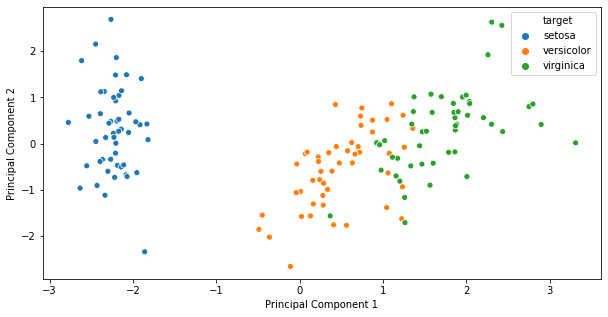

In [18]:
# PCA 결과를 시각화를 통해 확인합니다.
plt.figure(figsize=(10, 5))
sns.scatterplot(x = df_pca['Principal Component 1'], y = df_pca['Principal Component 2'], hue = df_pca['target'])

In [19]:
# 주성분들의 설명력을 확인합니다.
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

PC1은 데이터를 약 72% 정도, PC2는 23% 정도 설명합니다.

### Factor Analysis : scikit-learn의 FactorAnalysis 이용

In [0]:
# Create factor analysis object and perform factor analysis
X = df.loc[:, features].values
fa = FactorAnalysis(n_components=10)
X_fa = fa.fit_transform(X)

In [21]:
df_fa = pd.DataFrame(data=X_fa, columns=['Factor1', 'Factor2', 'Factor3', 'Factor4'])
df_fa.head()

,Factor1,Factor2,Factor3,Factor4
0,-1.226043,0.269089,0.0,0.0
1,-1.232343,-0.201804,0.0,0.0
2,-1.330547,-0.109966,0.0,0.0
3,-1.302661,-0.235704,0.0,0.0
4,-1.263690,0.312552,0.0,0.0


Factor1과 Factor2만 유의미합니다.

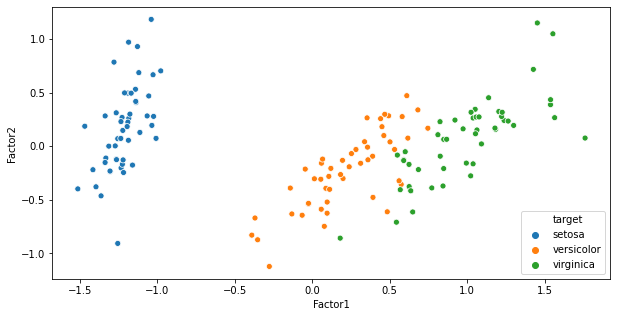

In [22]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x = df_fa['Factor1'], y = df_fa['Factor2'], hue=df['target'])

# Week6 HW

wine dataset을 활용하여 PCA 혹은 FA를 적용한 후, 적용하기 전과 적용한 후 분류모델의 성능을 비교해주세요.

## wine data

In [23]:
# Importing the dataset
from google.colab import files

uploaded = files.upload()

Saving Wine.csv to Wine (1).csv


In [24]:
wine = pd.read_csv('Wine.csv')
wine

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [25]:
wine.info() # No NA value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

## PCA, FA 적용 전

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [0]:
features=['Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines', 'Proline']
y=wine['Class'].values
X=wine[features].values #design matrix

In [0]:
# Test-Train Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)

In [0]:
# 분류모델: Logistic Regression
model = LogisticRegression(solver='sag', max_iter=100000)

In [30]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
pred=model.predict(X_test)
print(accuracy_score(y_test,pred))

0.9166666666666666


## PCA 적용

In [0]:
X= wine.loc[:, features].values
y = wine.loc[:, ['Class']].values

#Scaling
X_sca = StandardScaler().fit_transform(X) 


In [33]:
pd.DataFrame(data=X, columns=features).head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [0]:
# 다음으로 공분산행렬을 구합니다.
covariance_matrix = np.cov(X_sca.T)


In [35]:
# 공분산행렬에 대하여 eigenvalue와 eigenvector를 구합니다.
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)
print('eigenvalue :', eig_vals) # eigen values

eigenvalue : [4.73243698 2.51108093 1.45424187 0.92416587 0.85804868 0.64528221
 0.55414147 0.10396199 0.35046627 0.16972374 0.29051203 0.22706428
 0.25232001]


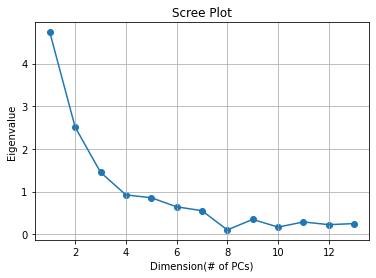

In [36]:
train_x = range(1, X_sca.shape[1]+1)

plt.scatter(train_x, eig_vals)
plt.plot(train_x, eig_vals)
plt.title('Scree Plot')
plt.xlabel('Dimension(# of PCs)')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [37]:
# PCA를 진행합니다.
pca = PCA(n_components=4) #위의 플롯으로 4로 정함
X_pca = pca.fit_transform(X) # PCA 적합

df_pca = pd.DataFrame(data=X_pca, columns = ["PC1", "PC2", "PC3", "PC4"])
df_pca = pd.concat([df_pca, wine[['Class']]], axis=1)
df_pca.head()

,PC1,PC2,PC3,PC4,Class
0,318.562979,21.492131,3.130735,-0.250114,1
1,303.097420,-5.364718,6.822835,-0.864035,1
2,438.061133,-6.537309,-1.113223,0.912411,1
3,733.240139,0.192729,-0.917257,-0.541251,1
4,-11.571428,18.489995,-0.554422,1.360896,1


In [38]:
# 주성분들의 설명력을 확인합니다.
pca.explained_variance_ratio_

array([9.98091230e-01, 1.73591562e-03, 9.49589576e-05, 5.02173562e-05])

In [0]:
y_pca=df_pca['Class'].values

# train-test 분류 (8:2)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.2, random_state=10)

In [0]:
# PCA 적용 전과 같은 분류모델 사용
model2 = LogisticRegression(solver='sag', max_iter=100000)

In [41]:
model2.fit(X_train_pca,y_train_pca)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
pred_pca=model2.predict(X_test_pca)
print(accuracy_score(y_test_pca,pred_pca))

0.9166666666666666


## FA 적용

In [0]:
X = wine.loc[:, features].values
fa = FactorAnalysis(n_components=4)
X_fa = fa.fit_transform(X)

In [44]:
df_fa = pd.DataFrame(data=X_fa, columns=['Factor1', 'Factor2', 'Factor3', 'Factor4'])
df_fa = pd.concat([wine[['Class']],df_fa], axis=1)
df_fa.head()

,Class,Factor1,Factor2,Factor3,Factor4
0,1,1.014330,1.638645,0.742199,0.419389
1,1,0.964980,-0.402547,0.392834,1.297122
2,1,1.394823,-0.493038,0.531681,-0.818399
3,1,2.334634,0.013705,0.472734,-0.273353
4,1,-0.036721,1.414353,0.703801,-1.325195


In [0]:
y_fa=df_fa['Class'].values
X_train_fa, X_test_fa, y_train_fa, y_test_fa = train_test_split(X_fa, y_fa, test_size=0.2, random_state=10)

In [0]:
# FA 적용 전과 같은 분류모델
model3 = LogisticRegression(solver='sag', max_iter=100000)

In [47]:
model3.fit(X_train_fa,y_train_fa)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
pred_fa=model3.predict(X_test_fa)
print(accuracy_score(y_test_fa,pred_fa))

0.8611111111111112


In [49]:
print("model1 accuracy :", accuracy_score(y_test,pred))
print("model2(PCA) accuracy :",accuracy_score(y_test_pca,pred_pca))
print("model3(FA) accuracy :",accuracy_score(y_test_fa,pred_fa))

model1 accuracy : 0.9166666666666666
model2(PCA) accuracy : 0.9166666666666666
model3(FA) accuracy : 0.8611111111111112
